In [1]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.linear_model import LinearRegression  
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from joblib import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from nltk.tokenize import word_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tag import pos_tag
from nltk.help import upenn_tagset
from collections import Counter
import pandas as pd

In [3]:
df = pd.read_csv('file.csv')
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
df.tweets

0         ChatGPT: Optimizing Language Models for Dialog...
1         Try talking with ChatGPT, our new AI system wh...
2         ChatGPT: Optimizing Language Models for Dialog...
3         THRILLED to share that ChatGPT, our new model ...
4         As of 2 minutes ago, @OpenAI released their ne...
                                ...                        
219289    Other Software Projects Are Now Trying to Repl...
219290    I asked #ChatGPT to write a #NYE Joke for SEOs...
219291    chatgpt is being disassembled until it can onl...
219292    2023 predictions by #chatGPT. Nothing really s...
219293     From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0
Name: tweets, Length: 219294, dtype: object

In [6]:
# İNTERNET ADRESLERİ SİLİNECEK

In [7]:
df.labels.value_counts(normalize=True)

labels
bad        0.491559
good       0.255415
neutral    0.253026
Name: proportion, dtype: float64

In [8]:
# YAPILAN YORUMLARIN YÜZDE 49'U "BAD"  ???

In [9]:
first_comment = df.tweets[1]
tokenized = word_tokenize(first_comment)
Counter(tokenized).most_common(10)

[('.', 2),
 ('Try', 1),
 ('talking', 1),
 ('with', 1),
 ('ChatGPT', 1),
 (',', 1),
 ('our', 1),
 ('new', 1),
 ('AI', 1),
 ('system', 1)]

In [10]:
first_tweet = df.tweets[1]
first_tweet

'Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr'

In [11]:
import re


In [12]:
# HTML etiketlerini kaldırmak için regex deseni
html_pattern = re.compile(r'<.*?>')

# first_comment içindeki HTML etiketlerini kaldır
cleaned_comment = re.sub(html_pattern, '', first_comment)

# 'https://t.co/...' gibi linkleri kaldırmak için regex deseni
link_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

# cleaned_comment içindeki linkleri kaldır
cleaned_comment = re.sub(link_pattern, '', cleaned_comment)

# Sonucu göster
print(cleaned_comment)

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. 


In [13]:
lower = word_tokenize(cleaned_comment.lower())
lower[:10]

['try',
 'talking',
 'with',
 'chatgpt',
 ',',
 'our',
 'new',
 'ai',
 'system',
 'which']

In [14]:
len(lower)

23

In [15]:
stop_words = [word for word in lower if word not in stopwords.words('english')]
stop_words[:10]

['try',
 'talking',
 'chatgpt',
 ',',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 '.']

In [16]:
# buradaki "@" işaretini unutmayalım!

In [17]:
len(stop_words)

15

In [18]:
is_alpha = [word for word in stop_words if word.isalpha()]
is_alpha[:10]

['try',
 'talking',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 'feedback',
 'help']

In [19]:
len(is_alpha)

12

In [20]:
# "@" işaretini vb. işaretleri silmiş olduk.

In [21]:
pos_tag(is_alpha)[:10]

[('try', 'VB'),
 ('talking', 'VBG'),
 ('chatgpt', 'JJ'),
 ('new', 'JJ'),
 ('ai', 'NN'),
 ('system', 'NN'),
 ('optimized', 'VBD'),
 ('dialogue', 'NN'),
 ('feedback', 'NN'),
 ('help', 'NN')]

In [22]:
verbs = [word for word, pos in pos_tag(is_alpha) if pos == 'VB']
verbs
#sadece fiilleri aldık.

['try', 'improve']

In [23]:
###İLK CÜMLEDE FİİL OLMADIĞI İÇİN BAŞKA BİR CÜMLEYLE DEVAM EDİYORUZ.

In [24]:
stemmed = [SnowballStemmer('english').stem(word) for word in is_alpha]
stemmed[:10]

['tri',
 'talk',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optim',
 'dialogu',
 'feedback',
 'help']

In [25]:
lemmatized = [WordNetLemmatizer().lemmatize(word) for word in is_alpha]
lemmatized[:10]

['try',
 'talking',
 'chatgpt',
 'new',
 'ai',
 'system',
 'optimized',
 'dialogue',
 'feedback',
 'help']

In [26]:
import nltk


# POS-Tagging örneği
text = "This is a sample sentence."
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
print(pos_tags)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN'), ('.', '.')]


In [27]:
Counter(lemmatized).most_common(10)

[('try', 1),
 ('talking', 1),
 ('chatgpt', 1),
 ('new', 1),
 ('ai', 1),
 ('system', 1),
 ('optimized', 1),
 ('dialogue', 1),
 ('feedback', 1),
 ('help', 1)]

In [28]:
# emojileri silmemiz gerekiyor.

In [29]:
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [30]:
second_tweet = df.tweets[2]
second_tweet

'ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34'

In [31]:
zero_tweet = df.tweets[4]
zero_tweet

'As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1'

In [32]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [33]:
import re

tweets = ['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1',
          'Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
          'ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34']

In [34]:
import emoji

emoji.emoji_list(tweets[0])

[{'match_start': 90, 'match_end': 91, 'emoji': '👇'}]

In [35]:
def remove_emoji(text):
    return ''.join(character for character in text if character not in emoji.EMOJI_DATA)

remove_emoji(tweets[0])

'As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now  https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1'

In [36]:
#Şimdi yukarıda işlediğimiz ön işleme adımlarını veri setimize uygulayalım.

In [37]:
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [38]:
'''''
lower_html = lambda x: str(x.lower()).replace('<br />',' ')

def stop_words(text):
    text = [word for word in word_tokenize(text) if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

def alphabetic(text):
    text = [word for word in word_tokenize(text) if word.isalpha()]
    text = ' '.join(text)
    return text

def stemmer(text):
    text = [SnowballStemmer('english').stem(word) for word in word_tokenize(text)]
    text = ' '.join(text)
    return text
'''''

"''\nlower_html = lambda x: str(x.lower()).replace('<br />',' ')\n\ndef stop_words(text):\n    text = [word for word in word_tokenize(text) if word not in stopwords.words('english')]\n    text = ' '.join(text)\n    return text\n\ndef alphabetic(text):\n    text = [word for word in word_tokenize(text) if word.isalpha()]\n    text = ' '.join(text)\n    return text\n\ndef stemmer(text):\n    text = [SnowballStemmer('english').stem(word) for word in word_tokenize(text)]\n    text = ' '.join(text)\n    return text\n"

In [39]:
# NLTK'nin wordnet lemmatizer'ını kullanacağız
lemmatizer = WordNetLemmatizer()

# HTML etiketlerini kaldırır ve metni küçük harflere çevirir
lower_html = lambda x: str(x.lower()).replace('<br />', ' ')

# Stopword'leri kaldırır
def stop_words(text):
    text = [word for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    text = ' '.join(text)
    return text

# Sadece alfabetik karakterleri bırakır
def alphabetic(text):
    text = [word for word in word_tokenize(text) if word.isalpha()]
    text = ' '.join(text)
    return text

# Lemmatizasyon fonksiyonu
def lemmatize(text):
    text = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    text = ' '.join(text)
    return text

# HTTPS içeren metinleri silme fonksiyonu
def remove_https(text):
    text = text.replace('https', '')
    return text

def remove_http(text):
    text = text.replace('http', '')
    return text


In [40]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# 'tweets' sütunundaki her bir metni işleyelim
df['tweets'] = df['tweets'].map(lower_html).map(stop_words).map(alphabetic).map(lemmatize).map(remove_https).map(remove_http)


# İşlenmiş veri çerçevesini kullanabilirsiniz
print(df['tweets'].head())


0    chatgpt optimizing language model dialogue  op...
1    try talking chatgpt new ai system optimized di...
2    chatgpt optimizing language model dialogue  ai...
3    thrilled share chatgpt new model optimized dia...
4    minute ago openai released new chatgpt use rig...
Name: tweets, dtype: object


In [41]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [42]:
# Veri setini eğitim ve test setlerine ayırma
X = df['tweets']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CountVectorizer uygulama
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Model oluşturma ve eğitme
model_count = LogisticRegression(max_iter=1000)
model_count.fit(X_train_count, y_train)

# Test seti üzerinde tahmin yapma
y_pred_count = model_count.predict(X_test_count)

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


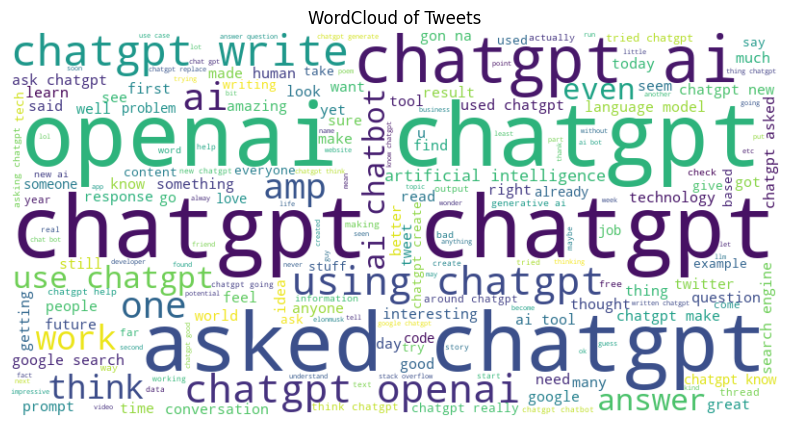

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Tüm tweetleri birleştirip tek bir metin oluşturma
all_tweets = ' '.join(df['tweets'])

# WordCloud oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# WordCloud'u görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Tweets')
plt.show()


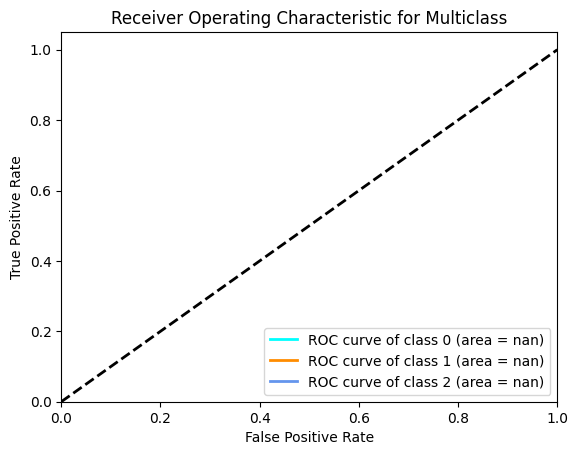

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Assuming y_test and model_count are already defined
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Change the classes list to match your classes
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
y_score = model_count.predict_proba(X_test_count)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [45]:
import joblib
joblib.dump(model_count, 'nlp_model.pkl')

['nlp_model.pkl']

In [46]:
joblib.dump(count_vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TFIDFVectorizer uygulama
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model oluşturma ve eğitme
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

# Test seti üzerinde tahmin yapma
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Performans metriklerini hesaplama
print("\nTFIDFVectorizer Performansı:")
print(classification_report(y_test, y_pred_tfidf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf))




TFIDFVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.87      0.95      0.90     21474
        good       0.83      0.81      0.82     11204
     neutral       0.74      0.63      0.68     11181

    accuracy                           0.83     43859
   macro avg       0.81      0.79      0.80     43859
weighted avg       0.82      0.83      0.82     43859

Confusion Matrix:
[[20321   235   918]
 [  585  9029  1590]
 [ 2563  1597  7021]]


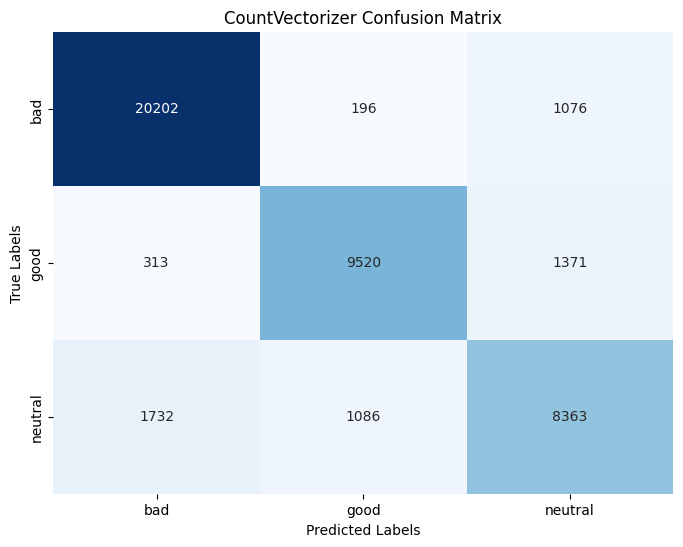

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# CountVectorizer için confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_count), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_count.classes_, yticklabels=model_count.classes_)
plt.title('CountVectorizer Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


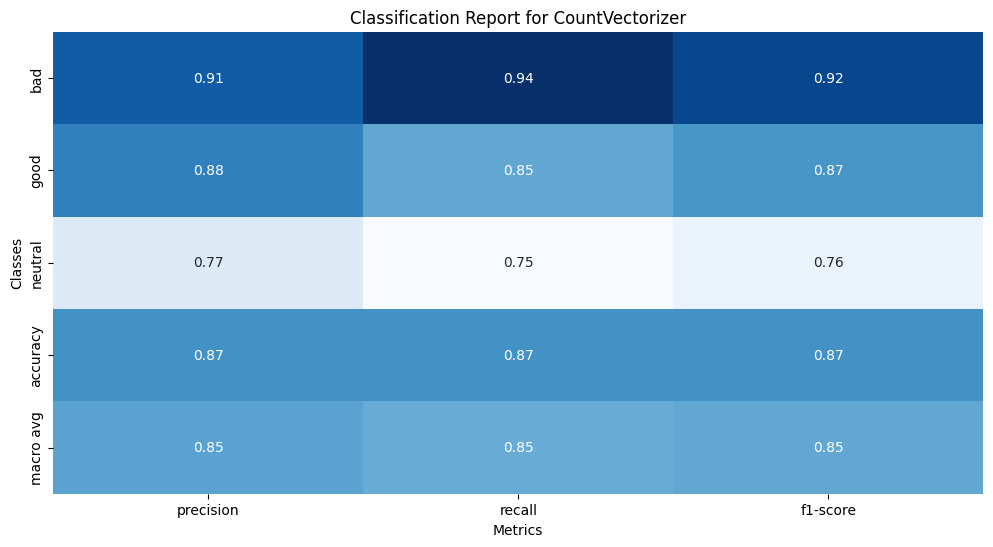

In [49]:
# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report görselleştirme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Precision, recall, f1-score ve support görselleştirme
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report for CountVectorizer')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


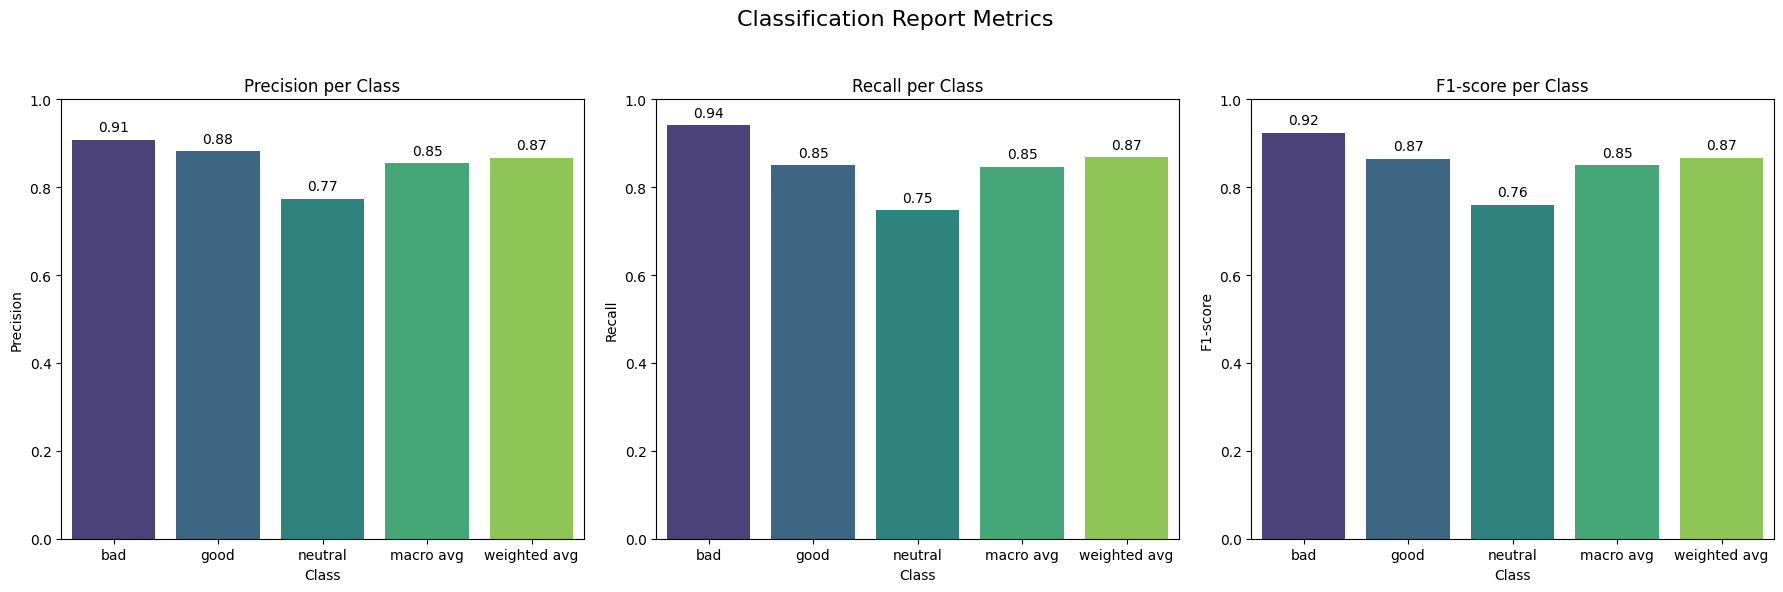

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Performans metriklerini hesaplama
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Precision, recall, f1-score ve support için bar grafikleri
metrics = ['precision', 'recall', 'f1-score']
report_df = report_df.drop('accuracy', axis=0)  # Accuracy'yi çıkarıyoruz çünkü her class için değil

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.barplot(x=report_df.index, y=report_df[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} per Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

plt.suptitle('Classification Report Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


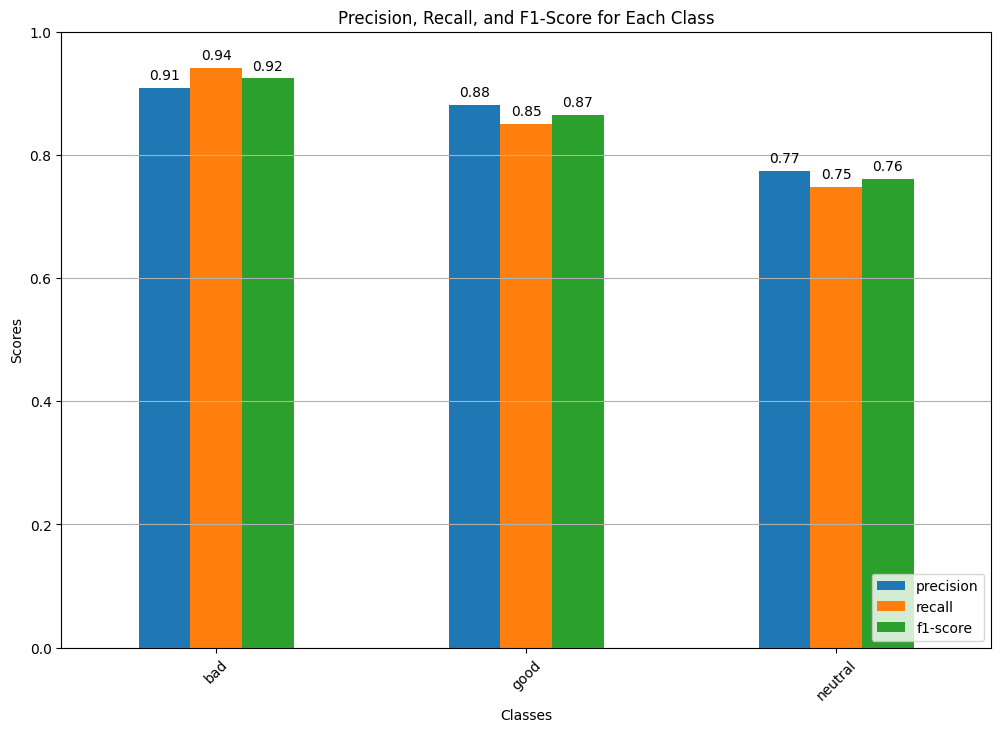

In [51]:
# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report görselleştirme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Precision, recall, f1-score görselleştirme
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')

# Her barın üstüne değeri ekleyelim
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.show()


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


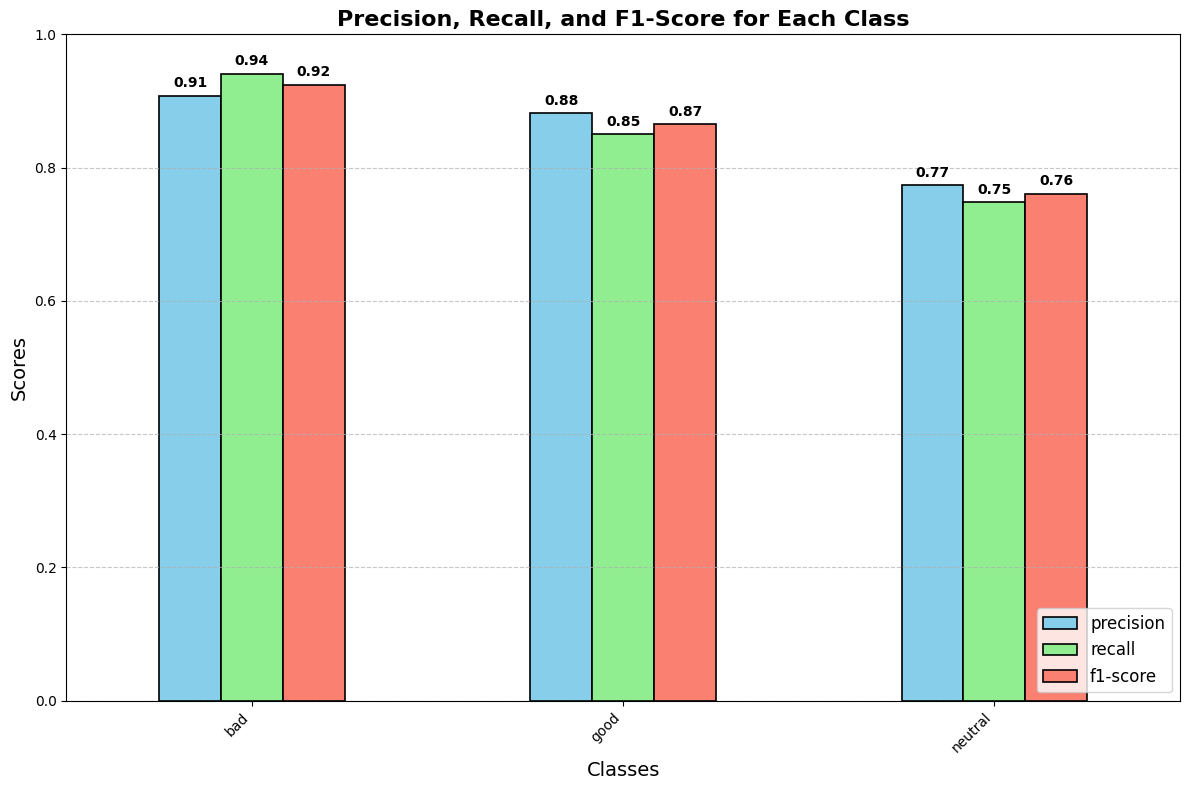

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report görselleştirme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Precision, recall, f1-score görselleştirme
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['skyblue', 'lightgreen', 'salmon']
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=1.2)

ax.set_title('Precision, Recall, and F1-Score for Each Class', fontsize=16, fontweight='bold')
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticklabels(report_df.index, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend(loc='lower right', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Her barın üstüne değeri ekleyelim
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 9),  # 9 points vertical offset
                textcoords='offset points', 
                ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


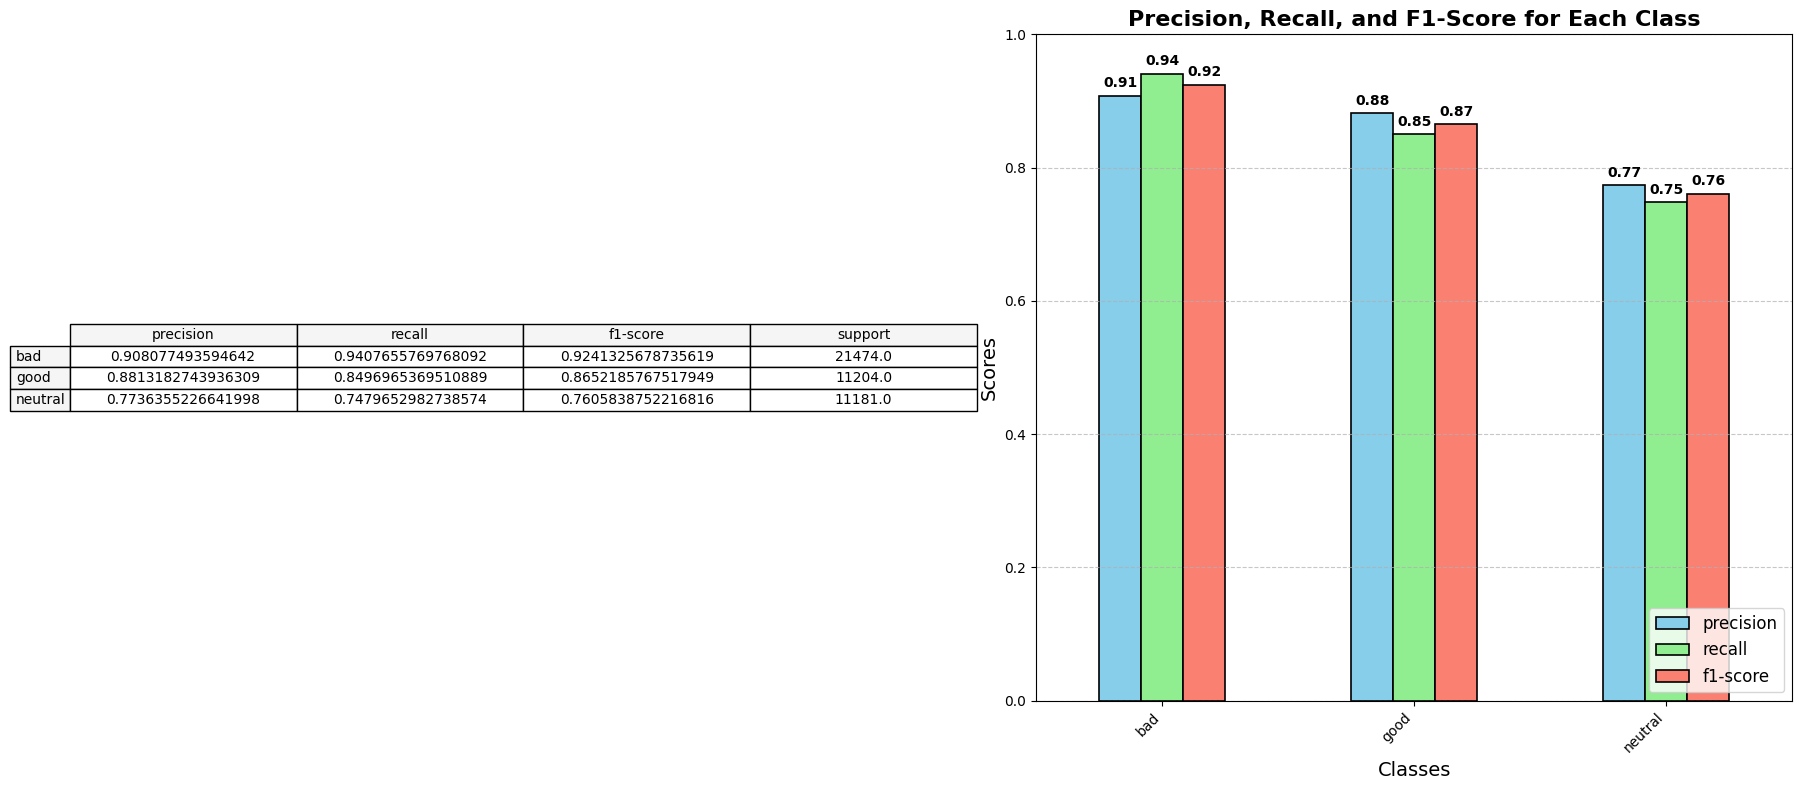

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report'u tabloya dönüştürme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Grafik ve tabloyu aynı figürde göstermek için
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Tablo oluşturma
ax1.axis('off')  # Tablo için eksenleri kapat
table = ax1.table(cellText=report_df.values,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  cellLoc='center',
                  loc='center',
                  colColours=['#f5f5f5']*len(report_df.columns),
                  rowColours=['#f5f5f5']*len(report_df.index))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Tablo ölçeğini ayarla

# Precision, recall, f1-score'ı bar grafik olarak görselleştirme
colors = ['skyblue', 'lightgreen', 'salmon']
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=ax2, color=colors, edgecolor='black', linewidth=1.2)

ax2.set_title('Precision, Recall, and F1-Score for Each Class', fontsize=16, fontweight='bold')
ax2.set_xlabel('Classes', fontsize=14)
ax2.set_ylabel('Scores', fontsize=14)
ax2.set_xticklabels(report_df.index, rotation=45, ha='right')
ax2.set_ylim(0, 1)
ax2.legend(loc='lower right', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Her barın üstüne değeri ekleyelim
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}', 
                 xy=(p.get_x() + p.get_width() / 2., height), 
                 xytext=(0, 9),  # 9 points vertical offset
                 textcoords='offset points', 
                 ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859



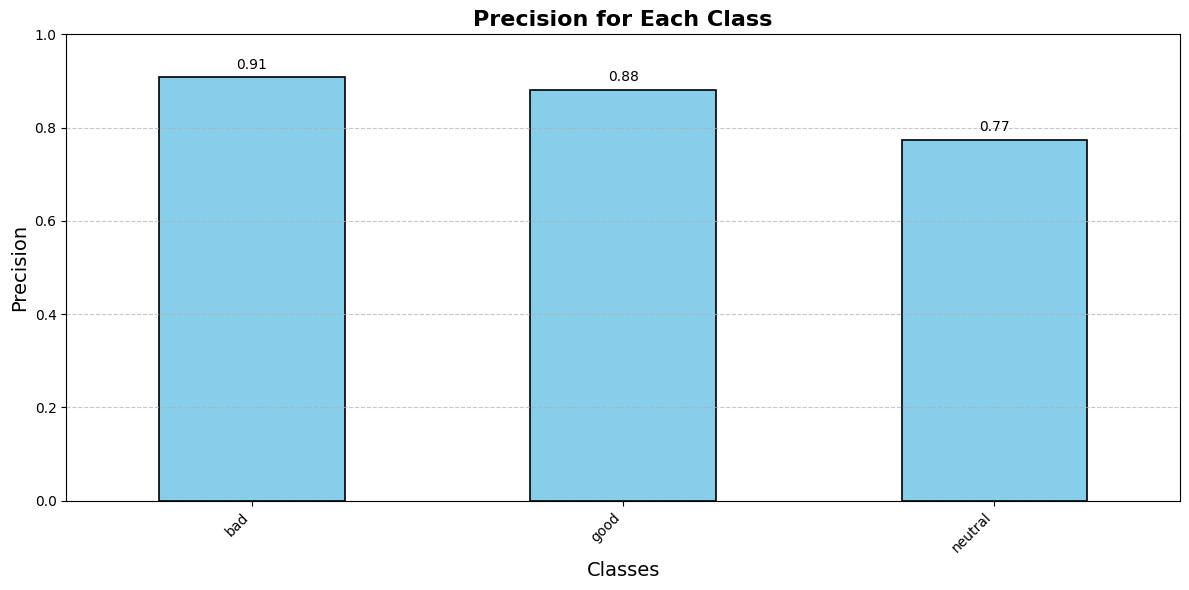

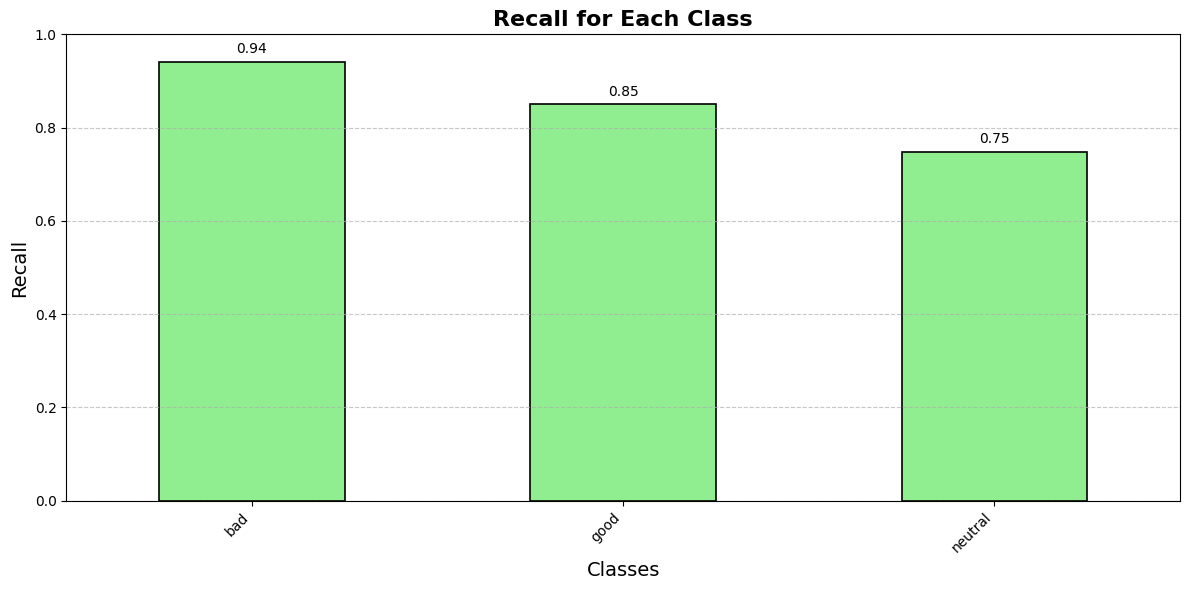

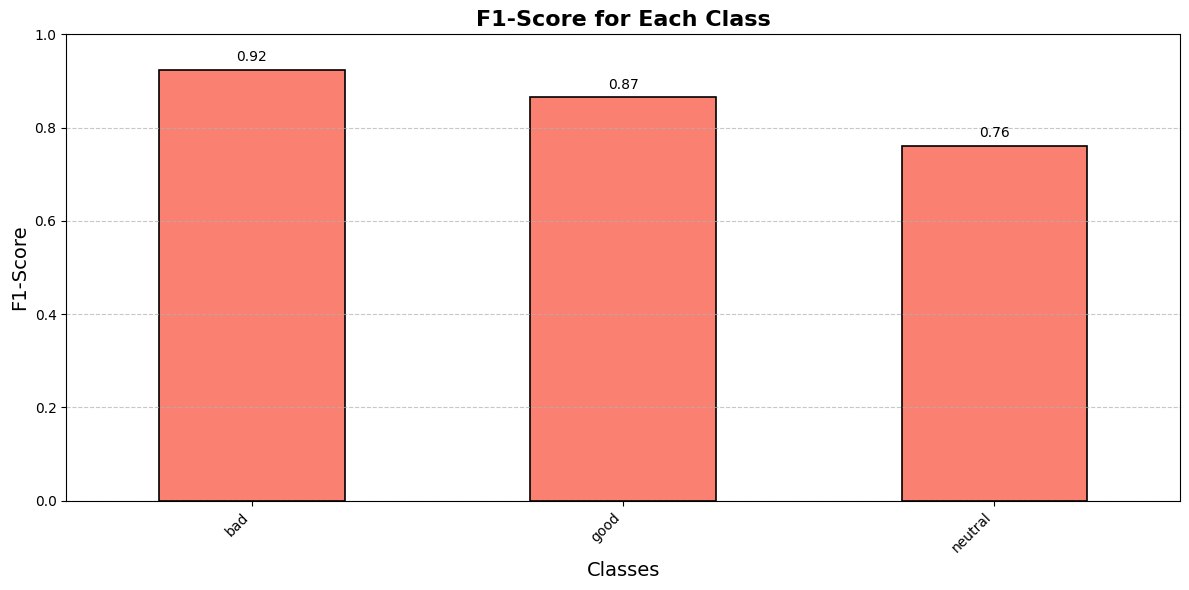

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))

# Classification report'u tabloya dönüştürme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Precision grafiği
plt.figure(figsize=(12, 6))
report_df['precision'].plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Precision for Each Class', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Her barın üstüne değeri ekleyelim
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Recall grafiği
plt.figure(figsize=(12, 6))
report_df['recall'].plot(kind='bar', color='lightgreen', edgecolor='black', linewidth=1.2)
plt.title('Recall for Each Class', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Her barın üstüne değeri ekleyelim
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# F1-Score grafiği
plt.figure(figsize=(12, 6))
report_df['f1-score'].plot(kind='bar', color='salmon', edgecolor='black', linewidth=1.2)
plt.title('F1-Score for Each Class', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Her barın üstüne değeri ekleyelim
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()



CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


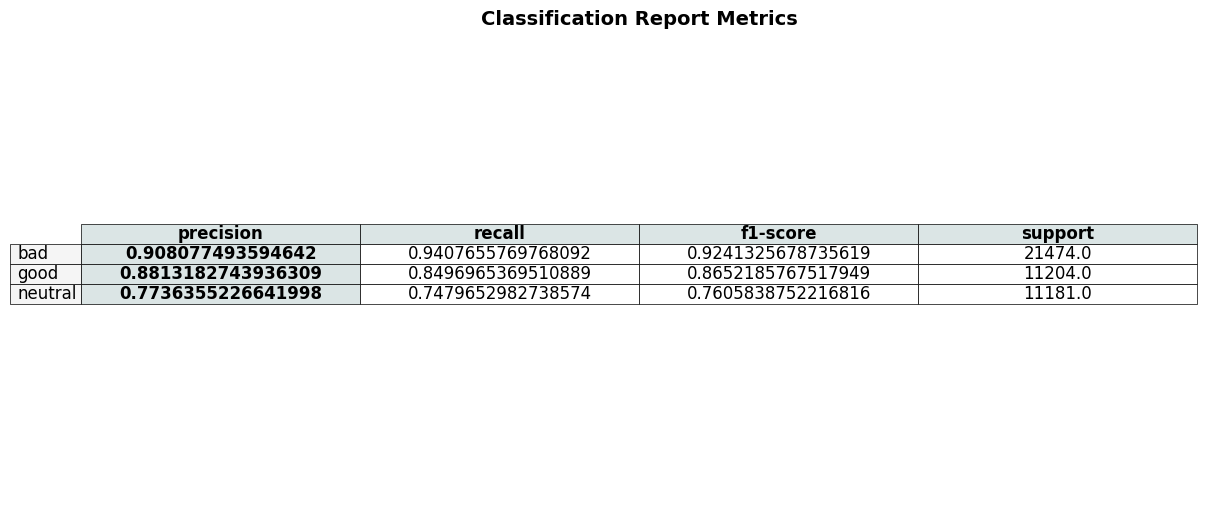

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report'u DataFrame'e dönüştürme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Tabloyu oluşturmak için figür ve eksen oluştur
fig, ax1 = plt.subplots(figsize=(12, 6))  # Tablo boyutunu ayarlayın
ax1.axis('off')  # Ekseni kapat

# Tabloyu oluştur
table = ax1.table(cellText=report_df.values,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  cellLoc='center',
                  loc='center',
                  colColours=['#f5f5f5']*len(report_df.columns),
                  rowColours=['#f5f5f5']*len(report_df.index))

# Tablo özelliklerini ayarla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Tablo ölçeğini ayarla

# Tablo hücre kenarlıkları
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_edgecolor('black')
    cell.set_linewidth(0.5)

# Başlık hücreleri için özel stil
for (i, key) in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0 or key[1] == 0:  # Başlık hücreleri
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#dbe5e5')

# Tabloyu göster
plt.title('Classification Report Metrics', fontsize=14, weight='bold')
plt.show()


CountVectorizer Performansı:
              precision    recall  f1-score   support

         bad       0.91      0.94      0.92     21474
        good       0.88      0.85      0.87     11204
     neutral       0.77      0.75      0.76     11181

    accuracy                           0.87     43859
   macro avg       0.85      0.85      0.85     43859
weighted avg       0.87      0.87      0.87     43859

Confusion Matrix:
[[20202   196  1076]
 [  313  9520  1371]
 [ 1732  1086  8363]]


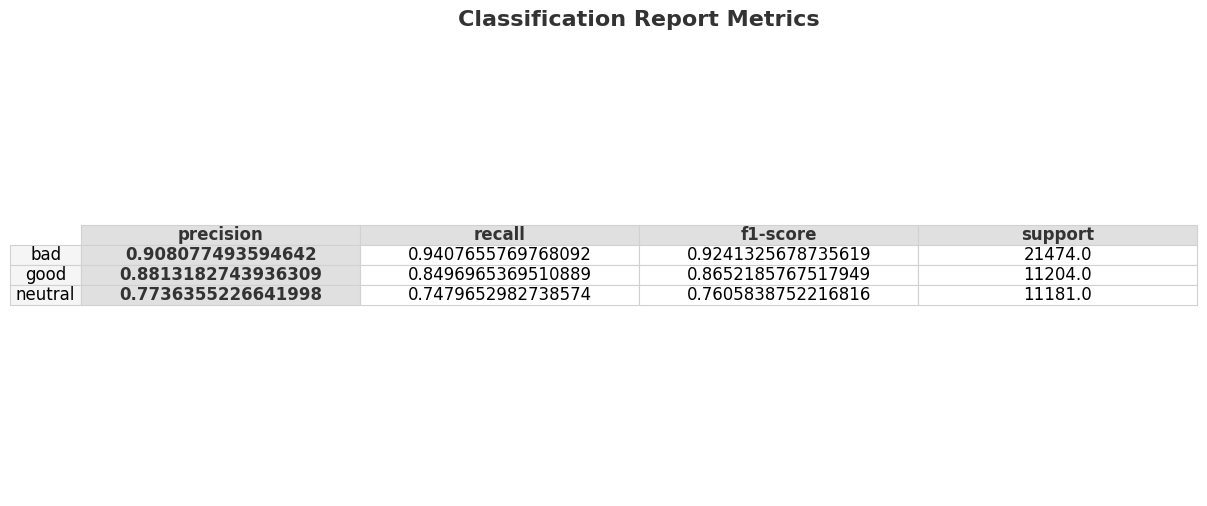

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Performans metriklerini hesaplama
print("CountVectorizer Performansı:")
print(classification_report(y_test, y_pred_count))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

# Classification report'u DataFrame'e dönüştürme
report = classification_report(y_test, y_pred_count, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Tabloyu oluşturmak için figür ve eksen oluştur
fig, ax = plt.subplots(figsize=(12, 6))  # Tablo boyutunu ayarlayın
ax.axis('off')  # Ekseni kapat

# Tabloyu oluştur
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f5f5f5']*len(report_df.columns),
                 rowColours=['#f5f5f5']*len(report_df.index))

# Tablo özelliklerini ayarla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Tablo ölçeğini ayarla

# Tablo hücre kenarlıkları
for (i, key) in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_edgecolor('#d1d1d1')  # Kenarlık rengi
    cell.set_linewidth(0.8)

# Başlık hücreleri için özel stil
for (i, key) in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0 or key[1] == 0:  # Başlık hücreleri
        cell.set_text_props(weight='bold', color='#333333')
        cell.set_facecolor('#e0e0e0')

# Her hücredeki metni ortala
for (i, key) in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_text_props(ha='center', va='center')

# Tabloyu göster
plt.title('Classification Report Metrics', fontsize=16, weight='bold', color='#333333')
plt.show()
